In [ ]:
# Name: Aidan Abregov
# Partner: Steve Sharp
# Course: ECE-196
# ML Project (5/2/2021)

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt
import sklearn.model_selection as model_selection

from sklearn import datasets #imports iris dataset
from sklearn.decomposition import PCA # imports the PCA class, allowing us to reduce the dimensionality of our data
from sklearn.linear_model import LogisticRegression # imports LogisticRegression class
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [17]:
# iris = pd.read_csv('iris.csv')
# Name new dataframe 'iris' from dataset 'iris.csv'
iris = datasets.load_iris()
print(iris)
# X is all of the data we will be using to judge closeness
X = iris.data[:,:]
# Y is the class/species
Y = iris.target

# Standardize Equation:Z = (X - mu(X))/stdev(X)
scaler = StandardScaler()
X = scaler.fit_transform(X)
# Train/Test Split "random_state is an optional variable, equate to a value for the same seed"
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, train_size=0.80, test_size=0.20)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [30]:
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
# iris_df.head()
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


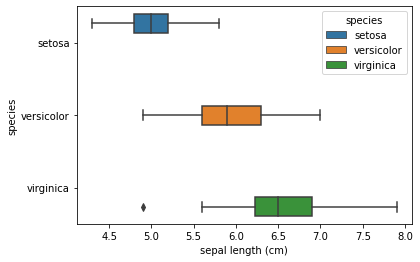

In [19]:
# sepal length boxplot
sns.boxplot(x = 'sepal length (cm)', y = 'species', data = iris_df, hue = 'species')
# split into diff cells

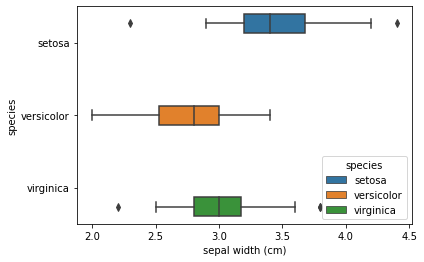

In [20]:
# sepal width boxplot
sns.boxplot(x = 'sepal width (cm)', y = 'species', data = iris_df, hue = 'species')

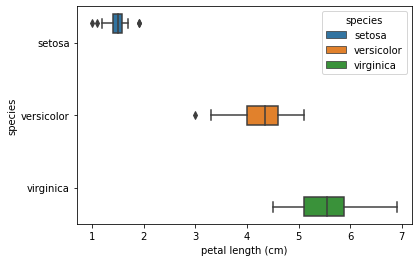

In [21]:
# petal length boxplot
sns.boxplot(x = 'petal length (cm)', y = 'species', data = iris_df, hue = 'species')

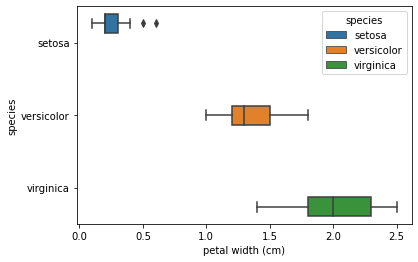

In [22]:
# petal width boxplot
sns.boxplot(x = 'petal width (cm)', y = 'species', data = iris_df, hue = 'species')

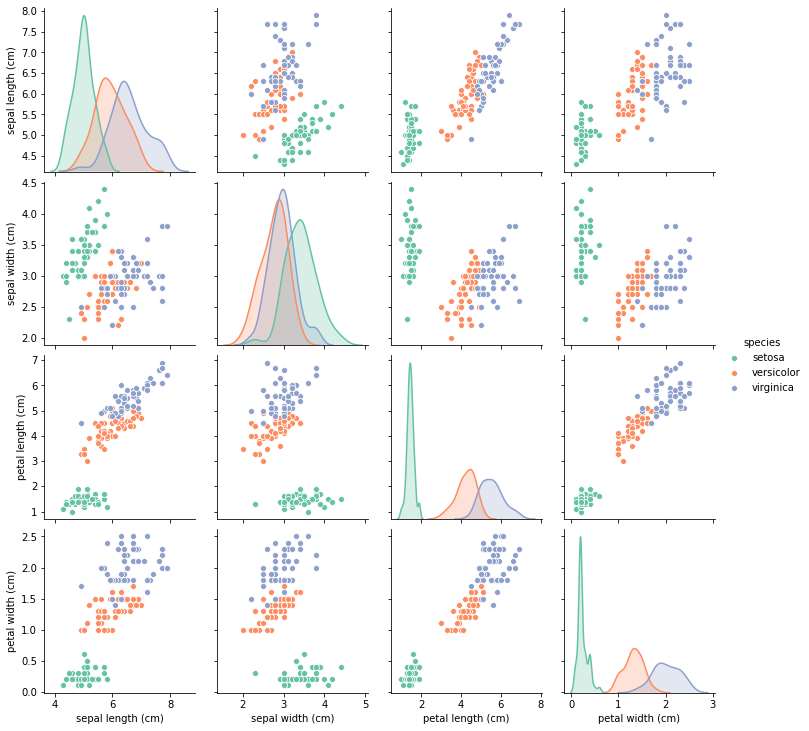

In [23]:
# Pair Plot 4x4 scatter & density plots
sns.pairplot(data=iris_df, hue='species', palette='Set2')

In [25]:
# KNN Classifier
classifier = KNeighborsClassifier(n_neighbors = 5) # 3,5,7,9

# apply fit method to classifier (sklearn)
classifier.fit(X_train, Y_train)

# apply predict method to classifier (sklearn)
y_pred = classifier.predict(X_test)

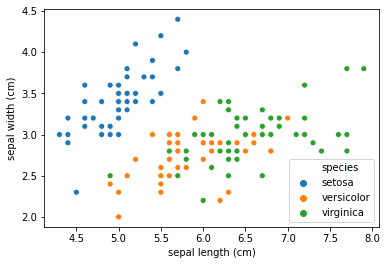

In [31]:
# sepal dim scatterplot
sns.scatterplot(x = 'sepal length (cm)', y = 'sepal width (cm)', data = iris_df, hue = 'species')
# iris setosa is isolated like usual, but versicolor and virginica are much more mixed than in most cases

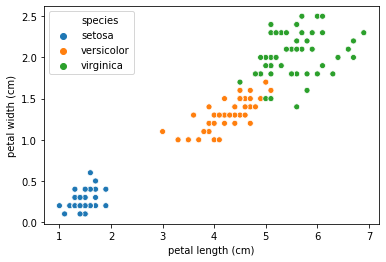

In [32]:
# petal dim scatterplot
sns.scatterplot(x = 'petal length (cm)', y = 'petal width (cm)', data = iris_df, hue = 'species')
# Interesting display when the petal dimensions are compared to each other
# Nearly makes 3 distinct clusters of each class, esp. when compared to the sepal dim scatterplot

In [27]:
# This prints out a confusion matrix which let's us see which classifiers were wrongly predicted for other classifiers
# y_test were the true species of the testing samples
# y_pred were the predicted values of the testing samples
result = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(Y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(Y_test, y_pred)
print("Accuracy:", result2)

Confusion Matrix:
[[ 8  0  0]
 [ 0 10  0]
 [ 0  0 12]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        12

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy: 1.0


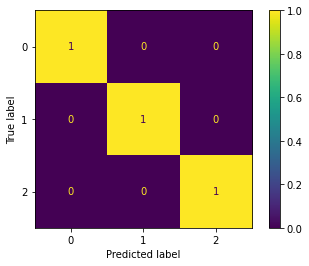

In [28]:
# Plot a Confusion Matrix Heat Map which allows for a detailed view of what classes were mischaracterized by other classes
# Figure out which predictions were wrong and what the accurate answer was supposed to be
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X_test, Y_test, normalize='true')